This notebook performs exploratory data analysis on the Titanic dataset. The goal is to understand the structure of the data, clean missing values, visualize key patterns, and prepare a cleaned dataset for modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


# 1_Data Loading & Inspection
In this section, we load the Titanic dataset and display the first few rows to understand its structure. We also check the dimensions and basic characteristics of the data

In [31]:
#1_ Load and Inspect the Dataset 

df = sns.load_dataset("titanic")

# Display first 5 rows
df.head()

# Display last 5 rows
df.tail()

# Show data types and non-null counts
df.info()

# Statistical summary
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# 2_Data Cleaning
This section provides an overview of the dataset. It includes data types, missing values, and statistical summaries to help identify issues that must be fixed before analysis
The dataset contains missing values in several columns. In this section, we handle them by imputing numerical values with the median and categorical values with the mode. This ensures the dataset remains consistent and ready for further analysis

In [33]:
# 2_ Data Cleaning 

# Number of duplicate rows
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()

# Fill numerical missing values with median
df["age"] = df["age"].fillna(df["age"].median())
df["fare"] = df["fare"].fillna(df["fare"].median())

# Fill categorical missing values with mode
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["class"] = df["class"].fillna(df["class"].mode()[0])
df["deck"] = df["deck"].fillna(df["deck"].mode()[0])

# Re-check missing values
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

# 3_Bivariate Analysis
This section visualizes the overall survival rate using a count plot. The plot helps us understand the distribution between passengers who survived and those who did not
This visualization shows survival counts grouped by gender. It highlights how gender influenced the likelihood of survival on the Titanic
In this section, we examine the survival distribution across different passenger classes. The visualization helps identify socioeconomic patterns related to survival
This section visualizes the age distribution of passengers with a histogram. It provides insights into the age demographics on the ship
This scatter plot shows the relationship between passenger age and ticket fare. It helps identify trends or unusual patterns in ticket pricing across age groups
This section uses a boxplot to compare fare distributions across different classes. It gives a clear view of how ticket prices varied among socio-economic groups on the ship
This section shows a grouped count plot comparing survival outcomes across passenger classes and genders. It helps reveal combined patterns in survival likelihood
The pairplot provides a multi-dimensional view of relationships among selected numerical variables, colored by survival status. It helps identify deeper patterns in the dataset
After handling missing values and validating the processed data, the cleaned dataset is saved as a CSV file. This file can be used for further modeling or machine learning tasks

# Numerical Features – Histograms and Boxplots

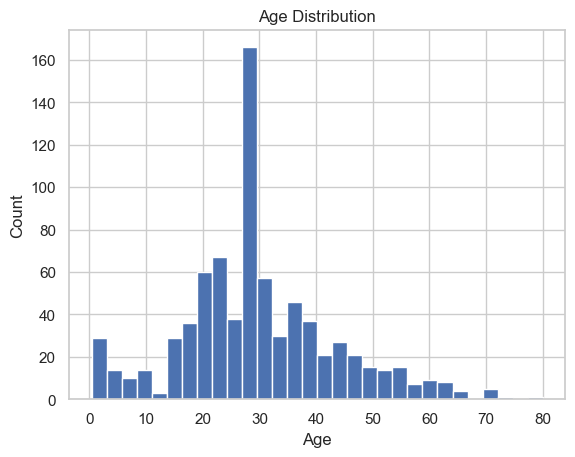

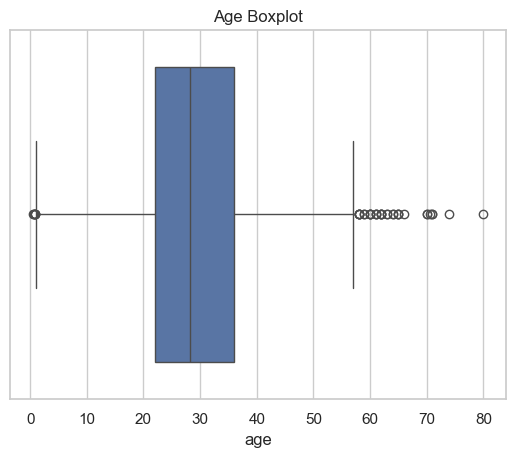

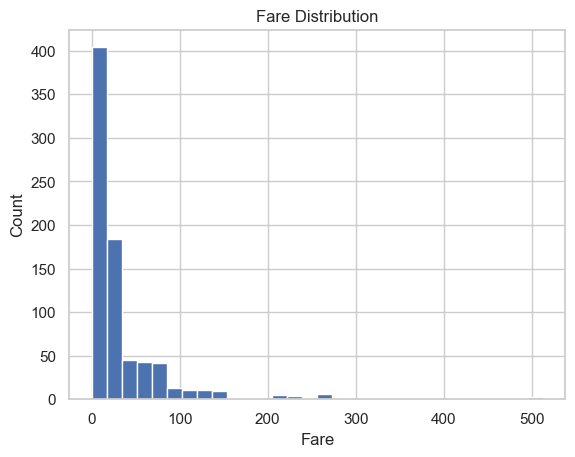

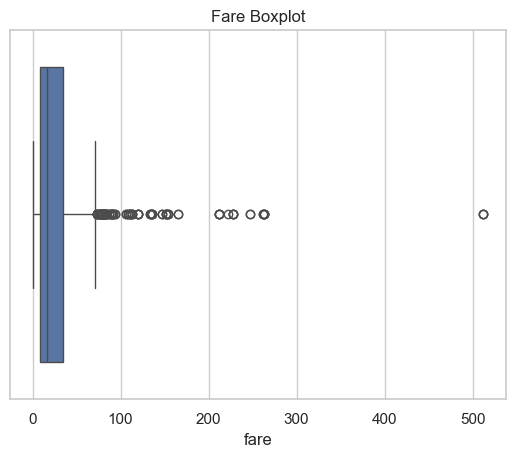

In [35]:
#3_univariate Analysis ===

# Histogram: Age
plt.hist(df["age"], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Boxplot: Age
sns.boxplot(x=df["age"])
plt.title("Age Boxplot")
plt.show()

# Histogram: Fare
plt.hist(df["fare"], bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Boxplot: Fare
sns.boxplot(x=df["fare"])
plt.title("Fare Boxplot")
plt.show()


# Categorical Features – Count Plots

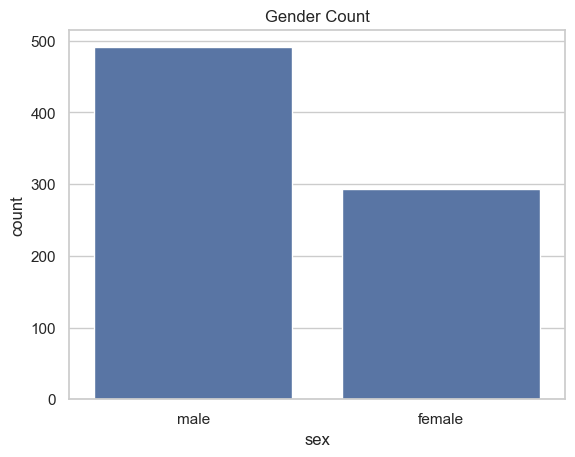

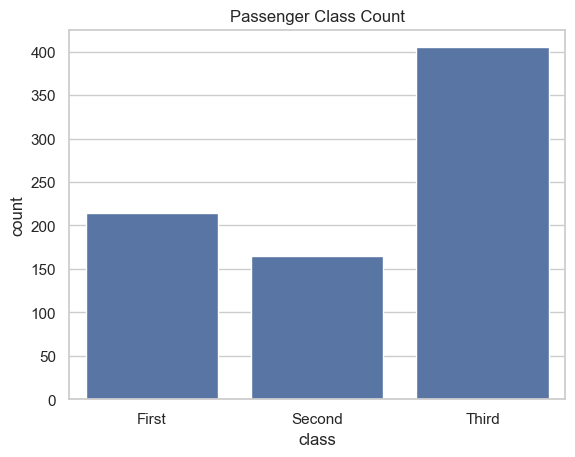

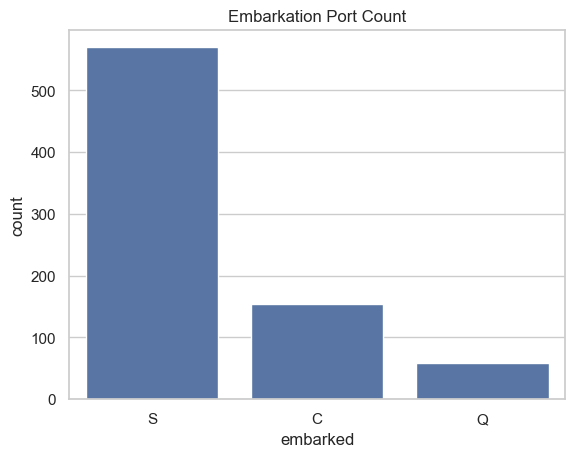

In [14]:
# Count plot: Gender
sns.countplot(x="sex", data=df)
plt.title("Gender Count")
plt.show()

# Count plot: Class
sns.countplot(x="class", data=df)
plt.title("Passenger Class Count")
plt.show()

# Count plot: Embarked
sns.countplot(x="embarked", data=df)
plt.title("Embarkation Port Count")
plt.show()


# Bivariate Analysis

# Survival vs Gender

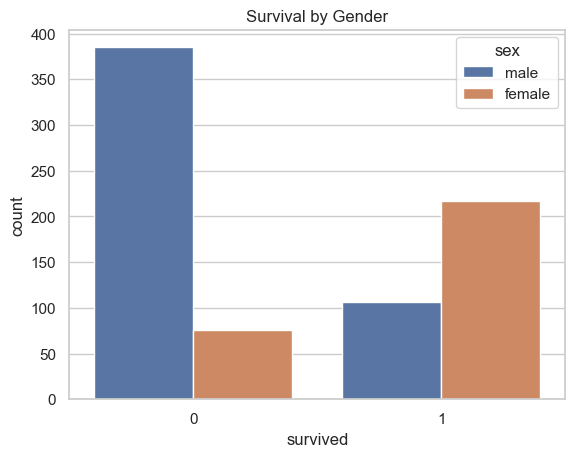

In [16]:
sns.countplot(x="survived", hue="sex", data=df)
plt.title("Survival by Gender")
plt.show()


# Survival vs Passenger Class

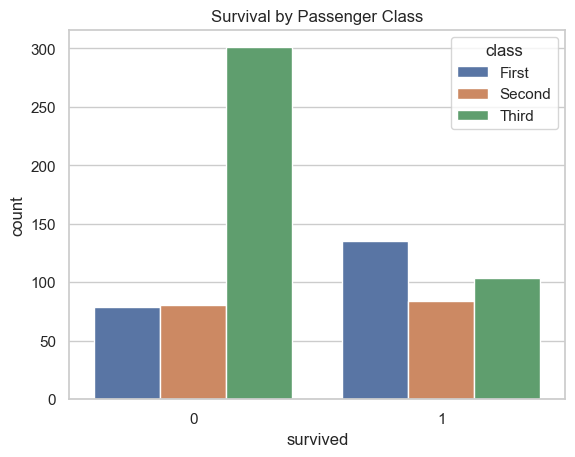

In [18]:
sns.countplot(x="survived", hue="class", data=df)
plt.title("Survival by Passenger Class")
plt.show()


# Age vs Survival (Boxplot + Violin)

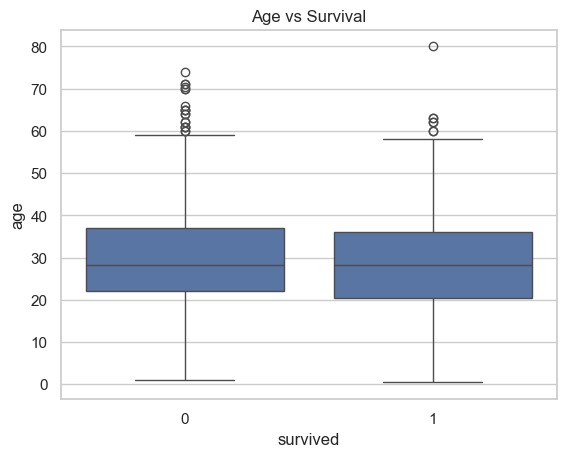

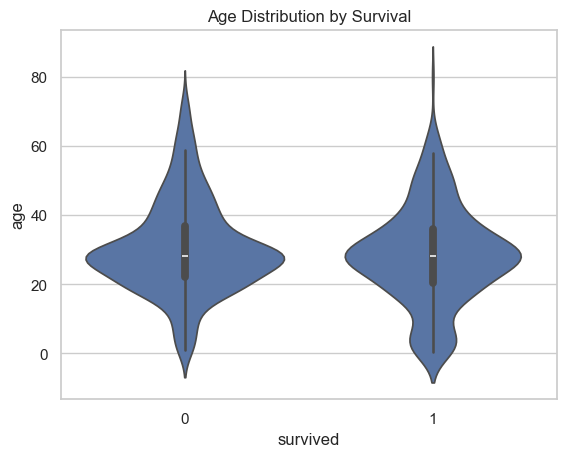

In [20]:
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age vs Survival")
plt.show()

sns.violinplot(x="survived", y="age", data=df)
plt.title("Age Distribution by Survival")
plt.show()


# Correlation Heatmap

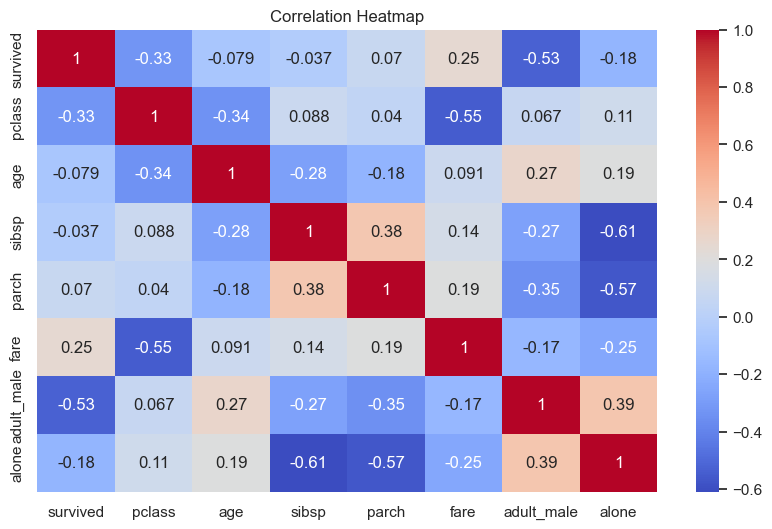

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Fare vs Survival (Regression)

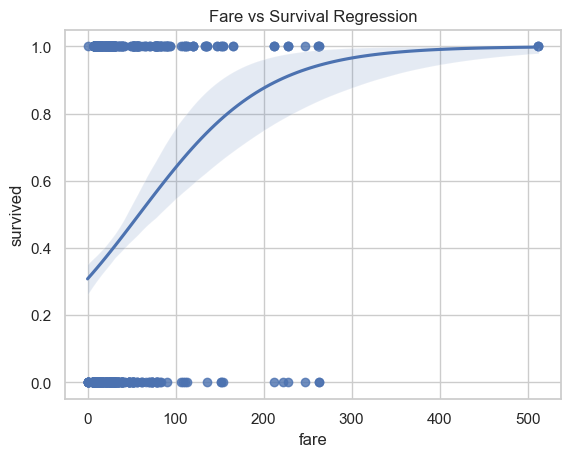

In [25]:
sns.regplot(x="fare", y="survived", data=df, logistic=True)
plt.title("Fare vs Survival Regression")
plt.show()


# 5_Insights & Summary
This notebook explored and cleaned the Titanic dataset, visualized important patterns, and produced a ready-to-use cleaned file. The analysis highlights how factors like gender and passenger class influenced survival outcomes
Female passengers showed a much higher survival rate compared to males  
Passengers in first class had the highest survival probability  
Younger passengers were more likely to survive than older passengers  
The Fare feature showed many outliers and large variation among passengers  
The Cabin and Deck fields originally had many missing values before cleaning  
After cleaning the dataset contains no missing values in important features  
Gender and passenger class have the strongest relationships with survival  
The age distribution is roughly normal with noticeable outliers  
Different embarkation ports show different passenger distributions  
The cleaned dataset is ready for modeling and further analysis  


In [29]:
print("""
1_Female passengers showed a much higher survival rate compared to males  
2_Passengers in first class had the highest survival probability  
3_Younger passengers were more likely to survive than older passengers  
4_The Fare feature showed many outliers and large variation among passengers  
5_The Cabin and Deck fields originally had many missing values before cleaning  
6_After cleaning the dataset contains no missing values in important features  
7_Gender and passenger class have the strongest relationships with survival  
8_The age distribution is roughly normal with noticeable outliers  
9_Different embarkation ports show different passenger distributions  
10_The cleaned dataset is ready for modeling and further analysis  

""")



1_Female passengers showed a much higher survival rate compared to males  
2_Passengers in first class had the highest survival probability  
3_Younger passengers were more likely to survive than older passengers  
4_The Fare feature showed many outliers and large variation among passengers  
5_The Cabin and Deck fields originally had many missing values before cleaning  
6_After cleaning the dataset contains no missing values in important features  
7_Gender and passenger class have the strongest relationships with survival  
8_The age distribution is roughly normal with noticeable outliers  
9_Different embarkation ports show different passenger distributions  
10_The cleaned dataset is ready for modeling and further analysis  




# Export Cleaned Dataset

In [39]:
df.to_csv("titanic_cleaned.csv", index=False)
